In [23]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
def signal_to_noise(data):
    mean = np.mean(data)
    std = np.std(data)
    
    return mean / std
    

In [41]:
file = 'test_images/circle.jpg'
img = np.array(Image.open(file).convert('L'))

(<matplotlib.image.AxesImage at 0x7f4152e1c940>, (-0.5, 511.5, 511.5, -0.5))

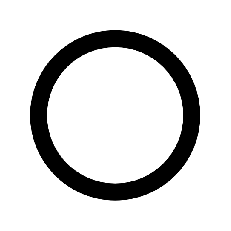

In [42]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255), plt.axis('off')

In [43]:
snr = signal_to_noise(img)
print("SNR for the original Image: ", snr)

SNR for the original Image:  2.201536664312144


(<matplotlib.image.AxesImage at 0x7f4155127fd0>, (-0.5, 511.5, 511.5, -0.5))

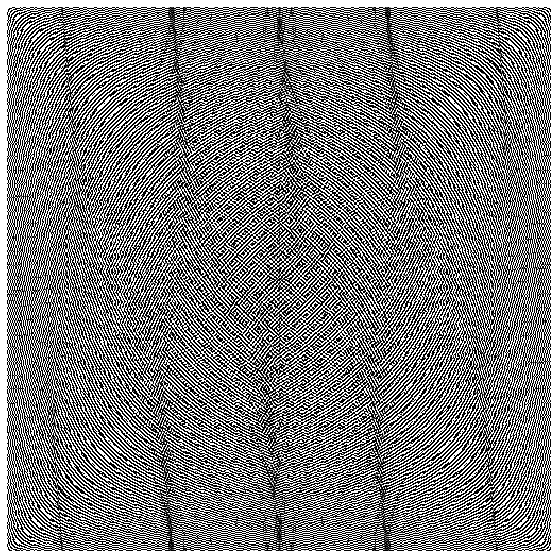

In [46]:
freq = fp.fft2(img)
freq_img = freq.real
plt.figure(figsize=(10,10))
plt.imshow(freq_img, cmap='gray', vmin=0, vmax=255), plt.axis('off')

/home/tintin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.5, 511.5, 511.5, -0.5)

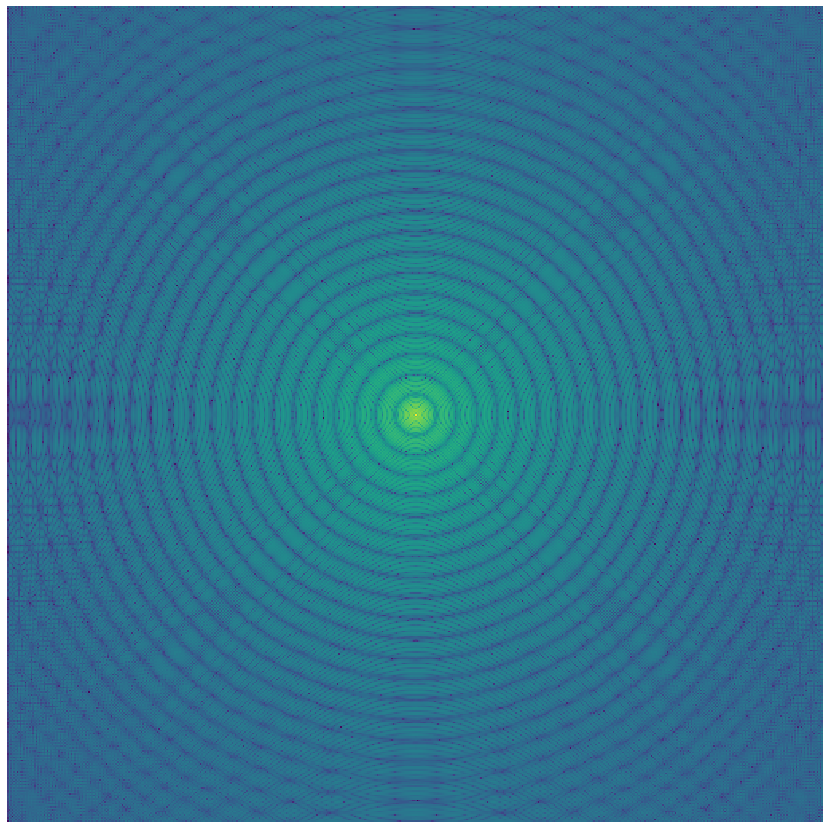

In [47]:
freq_2 = fp.fftshift(freq)
plt.figure(figsize=(15,15))
plt.imshow((20*np.log10(0.1 + freq_2)).astype(int)) 
plt.axis('off')

In [48]:
img_freq = fp.ifft2(freq).real

SNR for the Image after reconstrucion:  2.201536664312144


(<matplotlib.image.AxesImage at 0x7f41550154e0>, (-0.5, 511.5, 511.5, -0.5))

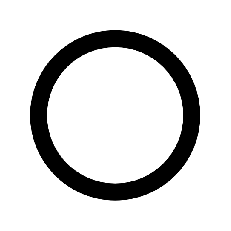

In [49]:
snr = signal_to_noise(img_freq)
print("SNR for the Image after reconstrucion: ", snr)
plt.imshow(img_freq, cmap='gray', vmin=0, vmax=255), plt.axis('off')